<h1> Engineering Numerical Methods, AGH UST</h1>
<h3> Author: Tymoteusz Ciesielski </h3>
<h2> Lab 10 - Wave equation. Verlet Method. </h2>
<h2> Control of the timestep. </h2>

We are gonna be solving the wave equation:

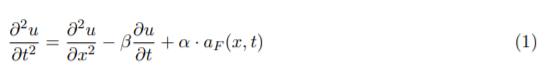

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, exp

In [63]:
#kronecker delta function
def kronecker_delta(x, x_f):
    return (0 if x!=x_f else 1) 

# oscillaton force (?) W h a t d e heck is x_f here?
# t_max - time of the simulation
def a_f(x, t):
    t_max = n_t * d_t
    #print(kronecker_delta(x, x_f))
    return cos(50*t/t_max) * kronecker_delta(x, x_f)

In [64]:
def count_energy():
    summed = 0
    for i in range(1, n_x): #summing all the elements
        summed += v[i]**2 + ((u[i+1] - u[i-1])/(2*delta))**2
    summed *= (delta/2) #proper coefficient
    energy = delta/4 * ( ((u[1]-u[0])/delta)**2 + ((u[n_x] - u[n_x-1])/delta)**2 ) + summed  
    return energy

#iteration is the time for which we are calculating 
def count_acceleration():
    for i in range(n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta * (u[i] - u_0[i])/d_t + alfa * a_f(x=i, t=iteration)
    


In [65]:
#initialisation

n_x = 150 #number of nodes on the string
n_t = 1000 #number of timesteps
delta = 0.1 #dimension step length
d_t = 0.05 #timestep length

x_a = 7.5 #środek ciężkości funkcji gaussowskiej - centre of gravity of the gaussian function(?) - mean value(?)
sigma = 0.5 #rozmycie przestrzenne - dimensional blur(?) - standard deviation(?)

t_tab = np.arange(0, d_t * (n_t + 1), d_t) #time, + 1 so the interval is right-closed
x_tab = np.arange(0, delta * (n_x + 1), delta) #space dimension



In [66]:
#case 1
alfa = 0
beta = 0 #beta is a damping factor/damping ratio here

u_all_1 = np.zeros((n_t+1, n_x+1))

#tablica u_0 - wychylenia początkowe strun 
u_0 = np.zeros(n_x + 1)
#tablica u - wychylenie, zależne od czasu i od punktu na strunie
u = np.zeros(n_x + 1)
#tablica v - prędkości poszczególnych punktów struny
v = np.zeros(n_x + 1)
#tablica v_p -  v połowiczne - v_1/2
v_p = np.zeros(n_x + 1)
#tablica a -przyspieszenie
a = np.zeros(n_x + 1)

#2.3 - bounding conditions
u[0] = u[n_x] = 0
v[0] = v[n_x] = 0

#2.4 - begining conditions

#velocity in every point is equal 0
#position in every point is given by the Gaussian distribution
for i in range (1, n_x):
    u[i] = exp( -(i*delta - x_a)**2 / (2*sigma**2) )

#acceleration is calculated by equation (11)
for i in range(1, n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term

# plt.figure(0)
# plt.plot(a, label="position = u")
# plt.legend()

f_en = open("energy_beta_0.dat", "w")
f_pos = open("position_beta_0.dat", "w")
for iteration in range(1, n_t + 1):
    
    for i in range(1, n_x):
        v_p[i] = v[i] + d_t/2 * a[i]
    for i in range(1, n_x):
        u_0[i] = u[i]
    for i in range(1, n_x):
        u[i] = u[i] + d_t * v_p[i]
        u_all_1[iteration][i] = np.copy(u[i])
        f_pos.write("{} ".format(u[i]))
    for i in range(1, n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term
    for i in range(1, n_x):
        v[i] = v_p[i] + d_t/2 * a[i]
    f_en.write(str(count_energy())+ "\n")
    f_pos.write("\n\n")
    #f.write(u) - here, some change needed
    print(count_energy())
f_en.close()
f_pos.close()
        

0.8689750229387072
0.869658822341302
0.8706967962709146
0.8719545509804738
0.8732763913906686
0.8745097733908977
0.87552745662572
0.8762435188022979
0.8766209494870095
0.8766704354856331
0.8764417111697155
0.876010090752018
0.8754613158627162
0.8748776365911355
0.8743272686172849
0.8738583070980473
0.8734971186526533
0.8732504051484776
0.8731096620085359
0.8730566531991951
0.873068720830553
0.8731231178014243
0.8731999699917212
0.8732838393452971
0.8733641124225662
0.8734345652976524
0.8734924724415459
0.873537569617292
0.8735710874356544
0.8735949750926854
0.8736113535372738
0.8736221828422175
0.8736290997951287
0.8736333732926989
0.873635929739757
0.873637411580787
0.873638244350032
0.8736386982805388
0.8736389383448728
0.8736390615500067
0.8736391229185894
0.8736391525875007
0.8736391665091308
0.8736391728490235
0.8736391756507452
0.8736391768520323
0.8736391773516701
0.8736391775532015
0.8736391776320099
0.8736391776618794
0.8736391776728456
0.8736391776767454
0.8736391776780877
0.

0.8736391765409338
0.8736391781199091
0.8736391784986054
0.8736391781609176
0.8736391777293633
0.8736391775217711
0.8736391775358816
0.8736391776334156
0.8736391777032166
0.873639177715872
0.8736391776961285
0.8736391776760194
0.8736391776695007
0.873639177673268
0.8736391776787591
0.8736391776810666
0.8736391776803403
0.873639177678844
0.8736391776781289
0.8736391776782891
0.8736391776787076
0.8736391776789152
0.8736391776788682
0.8736391776787469
0.8736391776786903
0.8736391776787077
0.8736391776787432
0.8736391776787568
0.8736391776787461
0.8736391776787308
0.8736391776787179
0.8736391776786981
0.873639177678655
0.87363917767856
0.8736391776783623
0.873639177677962
0.87363917767716
0.8736391776755623
0.8736391776724117
0.8736391776662681
0.8736391776544039
0.8736391776317337
0.8736391775888672
0.8736391775086614
0.8736391773601873
0.8736391770882824
0.8736391765957345
0.8736391757132733
0.8736391741497682
0.8736391714107108
0.8736391666668135
0.8736391585453893
0.8736391448044339
0.

In [67]:
#case 2
alfa = 0
beta = 0.1 #beta is a damping factor/damping ratio here


u_all_2 = np.zeros((n_t+1, n_x+1))

#tablica u_0 - poprzednie wyniki wychyleń strun dla danej iteracji 
u_0 = np.zeros(n_x + 1)
#tablica u - wychylenie, zależne od czasu i od punktu na strunie
u = np.zeros(n_x + 1)
#tablica v - prędkości poszczególnych punktów struny
v = np.zeros(n_x + 1)
#tablica v_p - v połowiczne - v_1/2
v_p = np.zeros(n_x + 1)
#tablica a przyspieszenie punktów 
a = np.zeros(n_x + 1)

#2.3 - bounding conditions
u[0] = u[n_x] = 0
v[0] = v[n_x] = 0

#2.4 - begining conditions

#velocity in every point is equal 0
#position in every point is given by the Gaussian distribution
for i in range (n_x):
    u[i] = exp( -(i*delta - x_a)**2 / (2*sigma**2) )

#acceleration is calculated by equation (11)
for i in range(n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term
    
f_en = open("energy_beta_0.1.dat", "w")
f_pos = open("position_beta_0.1.dat", "w")
for iteration in range(1, n_t + 1):
    
    for i in range(1, n_x):
        v_p[i] = v[i] + d_t/2 * a[i]
    for i in range(1, n_x):
        u_0[i] = u[i]
    for i in range(1, n_x):
        u[i] = u[i] + d_t * v_p[i]
        u_all_2[iteration][i] = np.copy(u[i])
        f_pos.write("{} ".format(u[i]))
    for i in range(n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term
    for i in range(n_x):
        v[i] = v_p[i] + d_t/2 * a[i]
    f_en.write(str(count_energy())+ "\n")
    f_pos.write("\n\n")
    #f.write(u) - here, some change needed
    print(count_energy())
f_en.close()
f_pos.close()

0.8700767505806198
0.8705156414267716
0.8708347472507983
0.8707128422987168
0.8698715485738314
0.8681071918324392
0.8653115100959268
0.8614783519597209
0.8566961633077015
0.8511285867930737
0.8449873542464348
0.8385025075507845
0.831894773897087
0.8253538325616054
0.8190245995004535
0.8130019391570823
0.8073327555483449
0.8020234550502132
0.797050391911385
0.7923710429971296
0.7879341544960727
0.7836877685944397
0.7795846978111663
0.7755855456054762
0.7716597145347712
0.767784995368104
0.7639463291196849
0.7601342339472047
0.7563432450949928
0.7525705715390839
0.7488150541743506
0.7450764280783932
0.7413548447999361
0.7376505923692802
0.7339639512186267
0.7302951345905413
0.7266442756984648
0.723011436823591
0.7193966257780229
0.7157998123036413
0.7122209413953547
0.7086599429365218
0.7051167381183534
0.7015912434476422
0.6980833731142871
0.6945930403225504
0.6911201580062105
0.6876646391963416
0.6842263972024147
0.6808053456974706
0.6774013987560287
0.6740144708696527
0.67064447695235

0.09519394317376216
0.0945926135281524
0.09392064891660441
0.09317681275011876
0.09236564378794952
0.09149828179017634
0.0905925961214934
0.08967243155011084
0.08876590550852462
0.08790285157231767
0.08711167737812779
0.0864160551836554
0.08583195206322415
0.08536550499743986
0.08501214195100427
0.08475715468194317
0.0845776770213401
0.08444576523335645
0.08433207161447187
0.08420949648112738
0.08405622289420421
0.08385767898213203
0.08360720121209603
0.0833054340544611
0.08295873618694877
0.08257701924428475
0.08217149341810952
0.08175273524439204
0.08132935371734372
0.08090735549688978
0.08049014575454902
0.08007898543562186
0.07967367689301105
0.0792732655335877
0.07887660632874753
0.07848272381264104
0.07809096696686399
0.07770100909861967
0.0773127618177989
0.0769262659933448
0.07654160156526543
0.07615883373511458
0.07577799387130393
0.07539908327208268
0.07502208622101295
0.07464698243551825
0.07427375438157179
0.07390238929879142
0.07353287799832203
0.07316521274525917
0.072799

0.010937139331274257
0.010879756342771881
0.010822035245696183
0.01076388219902154
0.010705203400669206
0.01064590967295931
0.010585922151375163
0.010525179072428632
0.010463643612710157
0.010401312686208839
0.010338226557049739
0.010274479060822739
0.010210228134649342
0.010145706214506042
0.010081229848031543
0.010017207578491866
0.009954144783242861
0.009892643727347954
0.009833396685971024
0.00977716970508938
0.009724774553459206
0.009677026834614463
0.009634689230408796
0.009598400536900741
0.00956859352265456
0.009545407527446429
0.009528604778726012
0.009517502102971078
0.009510931383068603
0.009507242060903276
0.00950435662042697
0.009499885012866686
0.009491296557523
0.009476138686438153
0.009452282287666678
0.009418165072863083
0.009372999257512326
0.00931690959200899
0.009250973468774439
0.00917714647412751
0.009098073118530921
0.009016801106440084
0.00893643504961702
0.008859778363489484
0.00878901710911462
0.008725494956894784
0.008669614354425625
0.008620877580290528
0.00

In [68]:
#case 3
alfa = 0
beta = 1 #beta is a damping factor/damping ratio here

u_all_3 = np.zeros((n_t+1, n_x+1))

#tablica u_0 - poprzednie wyniki wychyleń strun dla danej iteracji 
u_0 = np.zeros(n_x + 1)
#tablica u - wychylenie, zależne od czasu i od punktu na strunie
u = np.zeros(n_x + 1)
#tablica v - prędkości poszczególnych punktów struny
v = np.zeros(n_x + 1)
#tablica v_p - v połowiczne - v_1/2
v_p = np.zeros(n_x + 1)
#tablica a przyspieszenie punktów 
a = np.zeros(n_x + 1)

#2.3 - bounding conditions
u[0] = u[n_x] = 0
v[0] = v[n_x] = 0

#2.4 - begining conditions
#velocity in every point is equal 0
#position in every point is given by the Gaussian distribution
for i in range (1, n_x):
    u[i] = exp( -(i*delta - x_a)**2 / (2*sigma**2) )
    
#acceleration is calculated by equation (11)
for i in range(1, n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term


# plt.figure(0)
# plt.plot(a, label="position = u")
# plt.legend()    

        
f_en = open("energy_beta_1.dat", "w")
f_pos = open("position_beta_1.dat", "w")
for iteration in range(1, n_t + 1):
    
    for i in range(1, n_x):
        v_p[i] = v[i] + d_t/2 * a[i]
    for i in range(1, n_x):
        u_0[i] = u[i]
    for i in range(1, n_x):
        u[i] = u[i] + d_t * v_p[i]
        u_all_3[iteration][i] = np.copy(u[i])
        f_pos.write("{} ".format(u[i]))
    for i in range(1, n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t #alfa is equal 0 therefore we skip this last term
    for i in range(1, n_x):
        v[i] = v_p[i] + d_t/2 * a[i]
    f_en.write(str(count_energy())+ "\n")
    f_pos.write("\n\n")
    #f.write(u) - here, some change needed
    print(count_energy())
f_en.close()
f_pos.close()

0.9728213694712737
0.9564898780037977
0.9345195359651228
0.90630860989016
0.871956639367345
0.8321744814075158
0.7881353773338889
0.7412931582541684
0.6931954603406184
0.6453167323766797
0.5989290984778785
0.5550205553771485
0.5142613930510792
0.47701266394901065
0.4433659335558324
0.4132016945333563
0.38625440327360794
0.3621743998616103
0.3405801510125166
0.3210975254615988
0.3033855931686122
0.28715041697996296
0.27214940778108393
0.25818915335777315
0.24511941851096603
0.23282548472025685
0.22122035682751018
0.2102377583292646
0.19982634849501824
0.1899452521072829
0.18056078737454312
0.17164418094798484
0.16317003660330456
0.15511534480747452
0.14745886028854732
0.14018071833225423
0.13326219937479253
0.12668558215576606
0.12043404794622432
0.1144916134176671
0.10884307930968076
0.10347398784729084
0.09837058518805945
0.09351978700312101
0.08890914625102464
0.08452682268091355
0.08036155383022912
0.0764026273870445
0.0726398548335012
0.06906354630684096
0.06566448662330691
0.06243

0.00016373472800639666
0.0001629845817581843
0.00016223787419595282
0.00016149458964761953
0.00016075471242250764
0.00016001822680669866
0.00015928511706623616
0.00015855536745860714
0.00015782896225199116
0.0001571058857507728
0.00015638612232490628
0.00015566965644005177
0.00015495647268511475
0.00015424655579398473
0.0001535398906589149
0.00015283646233403051
0.0001521362560287649
0.00015143925709238466
0.00015074545099196546
0.00015005482328699467
0.00014936735960409728
0.00014868304561511567
0.0001480018670210292
0.0001473238095430929
0.00014664885892133438
0.0001459770009194132
0.00014530822133400047
0.00014464250600641467
0.00014397984083428203
0.00014332021178140015
0.00014266360488465876
0.00014201000625761167
0.0001413594020909709
0.00014071177865076305
0.00014006712227510656
0.00013942541937055376
0.0001387866564087357
0.00013815081992375852
0.0001375178965105056
0.000136887872823763
0.00013626073557794935
0.00013563647154718825
0.000135015067565493
0.0001343965105269081
0.0

2.74397543757424e-05
2.7314042297562682e-05
2.718890615480809e-05
2.7064343308896614e-05
2.6940351133334807e-05
2.6816927013662046e-05
2.6694068347395674e-05
2.6571772543975908e-05
2.6450037024711418e-05
2.6328859222724734e-05
2.6208236582898353e-05
2.608816656182069e-05
2.5968646627732505e-05
2.5849674260473537e-05
2.573124695142936e-05
2.5613362203478456e-05
2.549601753093958e-05
2.537921045951937e-05
2.526293852626013e-05
2.5147199279487956e-05
2.503199027876095e-05
2.491730909481789e-05
2.4803153309526884e-05
2.468952051583443e-05
2.45764083177147e-05
2.4463814330118964e-05
2.435173617892529e-05
2.4240171500888582e-05
2.412911794359062e-05
2.4018573165390505e-05
2.3908534835375368e-05
2.379900063331111e-05
2.3689968249593475e-05
2.3581435385199488e-05
2.3473399751638777e-05
2.3365859070905508e-05
2.325881107543023e-05
2.3152253508032103e-05
2.304618412187133e-05
2.2940600680401704e-05
2.2835500957323517e-05
2.273088273653663e-05
2.262674381209368e-05
2.252308198815358e-05
2.2419895

In [69]:
#case 4

alfa = 1 #resonance factor
beta = 1 #beta is a damping factor/damping ratio here
x_f = 2.5

u_all_4 = np.zeros((n_t+1, n_x+1))

#tablica u_0 - poprzednie wyniki wychyleń strun dla danej iteracji 
u_0 = np.zeros(n_x + 1)
#tablica u - wychylenie, zależne od czasu i od punktu na strunie
u = np.zeros(n_x + 1)
#tablica v - prędkości poszczególnych punktów struny
v = np.zeros(n_x + 1)
#tablica v_p - v połowiczne - v_1/2
v_p = np.zeros(n_x + 1)
#tablica a przyspieszenie punktów 
a = np.zeros(n_x + 1)

#2.3 - bounding conditions
u[0] = u[n_x] = 0
v[0] = v[n_x] = 0

#2.4 - begining conditions
#velocity in every point is equal 0
#position in every point is equal 0

#acceleration is calculated by equation (11)
#HOTFIX 1.04 - changed range from starting 0 to starting 1
for i in range(1, n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t + alfa * a_f(i*delta, 0)
    
f_en = open("energy_alfa_1.dat", "w")
f_pos = open("position_alfa_1.dat", "w")
for iteration in range(1, n_t + 1):
    
    for i in range(1, n_x):
        v_p[i] = v[i] + d_t/2 * a[i]
    for i in range(1, n_x):
        u_0[i] = u[i]
    for i in range(1, n_x):
        u[i] = u[i] + d_t * v_p[i]
        u_all_4[iteration][i] = np.copy(u[i])
        f_pos.write("{} ".format(u[i]))
    for i in range(n_x):
        a[i] = (u[i+1] - 2*u[i] + u[i-1])/delta**2 - beta*(u[i] - u_0[i])/d_t + alfa * a_f(i*delta, iteration*d_t)
        #print(a_f(i*delta, iteration))
    for i in range(n_x):
        v[i] = v_p[i] + d_t/2 * a[i]
    f_en.write(str(count_energy())+ "\n")
    f_pos.write("\n\n")
    #f.write(u) - here, some change needed
    print(count_energy())
f_en.close()
f_pos.close()

9.773640500661605e-05
0.00027848109523340923
0.00046052629646279035
0.0006795535903475027
0.0008788191403276135
0.0010227665406269597
0.0011619949224013785
0.0012878889463351427
0.0013881614254345228
0.0014901691543969097
0.0015747538581271855
0.0016301332230878665
0.0016806393668442974
0.0017179900338221523
0.0017379503088124832
0.0017563604840646213
0.0017613547634650452
0.0017490464679516063
0.00173396254925553
0.0017099428488340776
0.001676524951875642
0.0016434477776521728
0.0016027679635860867
0.001554091581666088
0.0015066165677690107
0.0014559678449265177
0.001403315269382323
0.0013546963320670805
0.001304667203720705
0.0012542786797044446
0.0012093308988430644
0.0011666482052284314
0.0011278259859199087
0.001096420747054703
0.001068553175190576
0.0010455942455435008
0.0010309411170217574
0.0010220825840089333
0.001020367744788569
0.0010275799890386663
0.001040756843408301
0.0010609935774205956
0.0010899118028883739
0.0011253069007716486
0.001167999031200789
0.00121852396121789

0.0012399713967863044
0.001225996941868563
0.0012208049372531603
0.0012244468764211367
0.0012368859831487038
0.0012579975863130466
0.001287570381598371
0.0013253085523457042
0.0013708347204642454
0.001423693704281268
0.00148335705907243
0.0015492283619056798
0.0016206491827114157
0.0016969056705981621
0.0017772356835848455
0.0018608363947365148
0.001946872307868995
0.0020344836077436845
0.002122794758237605
0.0022109232555047537
0.00229798844469245
0.0023831203141353166
0.0024654681841072864
0.002544209206344271
0.0026185565885034766
0.002687767458342062
0.0027511502868801975
0.0028080717963441127
0.0028579632851381655
0.0029003263080257394
0.002934737655691211
0.002960853584204999
0.002978413251438494
0.0029872413244003077
0.0029872497298378442
0.0029784385307870488
0.002960895922654482
0.002934797351517297
0.002900403763730429
0.0028580590014991862
0.0028081863669507288
0.0027512843884421358
0.0026879218346326002
0.0026187320302056647
0.0025444065308577197
0.002465688217282734
0.0023

0.002544136206500317
0.002465351814466263
0.002382968158220653
0.0022978084267921994
0.002210723547879184
0.0021225836855562866
0.0020342695457756764
0.0019466635765354064
0.0018606411506405806
0.0017770618191568065
0.0016967607229488302
0.0016205402481177704
0.0015491620087131964
0.0014833392368261964
0.0014237296560991979
0.001370928909858336
0.0013254646095327736
0.0012877910628277302
0.0012582847343259951
0.0012372404838741574
0.0012248686203382582
0.0012212928001667993
0.0012265487917582207
0.0012405841179795223
0.0012632585804084012
0.001294345660061216
0.001333534780611089
0.0013804344114825857
0.001434575979817816
0.001495418552227014
0.0015623542395456359
0.0016347142705959144
0.001711775674266202
0.001792768503143008
0.0018768835265194038
0.001963280315913552
0.002051095642309541
0.0021394521012182877
0.0022274668793801117
0.0023142605755153774
0.0023989659869891634
0.002480736774596332
0.002558755918890951
0.002632243883567086
0.002700466404325334
0.002762741825401578
0.0028

<h3> 2.5 Results 
</h3>

<p>We want to have: </p>
<ul>
    <li> energy for every timestep </li>
    <li> u(x,t) - position of string nodes for every timestep </li>
    </ul>

<h3> 3. Plots </h3>


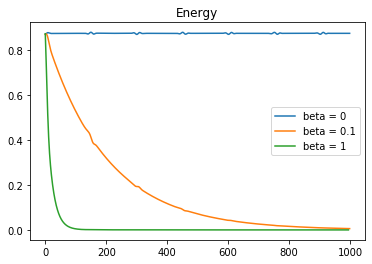

In [71]:
#plotting energy
data1 = open("energy_beta_0.dat").read().splitlines()
data2 = open("energy_beta_0.1.dat").read().splitlines()
data3 = open("energy_beta_1.dat").read().splitlines()
data4 = open("energy_alfa_1.dat").read().splitlines()
for i in range(len(data1)):
    data1[i] = float(data1[i])
    data2[i] = float(data2[i])
    data3[i] = float(data3[i])
    data4[i] = float(data4[i])

plt.figure(0)
plt.title(label = "Energy")
plt.plot(data1, label = "beta = 0")
plt.plot(data2, label = "beta = 0.1")
plt.plot(data3[4:], label = "beta = 1")
#plt.plot(data4, label = "alfa = 1")
plt.legend()

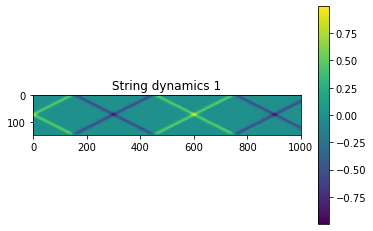

In [72]:
#plotting position 1

plt.figure(0)
plt.title("String dynamics 1")
plt.xlabel=("time")
plt.ylabel=("position")

plt.imshow(np.transpose(u_all_1))
plt.colorbar()


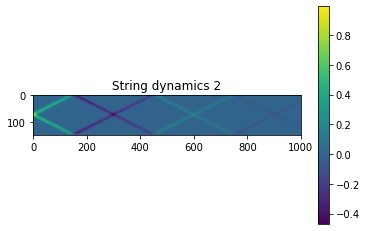

In [73]:
#plotting position 2

plt.figure(0)
plt.title("String dynamics 2")
plt.xlabel=("time")
plt.ylabel=("position")
plt.imshow(np.transpose(u_all_2))
plt.colorbar()

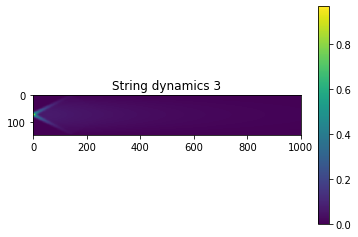

In [74]:
#plotting position 3

plt.figure(0)
plt.title("String dynamics 3")
plt.xlabel=("time")
plt.ylabel=("position")
#plt.axis.set(xlim=(0,n_t*d_t), ylim=(0, n_x*delta))
# plt.xticks(range( int(n_t*d_t)) )
# plt.yticks(range( int(n_x*delta)) )
plt.imshow(np.transpose(u_all_3))
plt.colorbar()
#plt.legend()


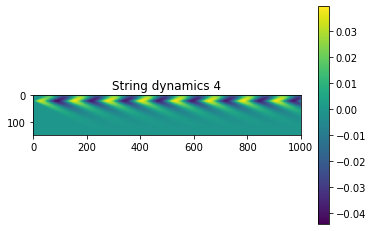

In [75]:
#plotting position 4

plt.figure(0)
plt.title("String dynamics 4")
plt.xlabel=("time")
plt.ylabel=("position")
#plt.axis.set(xlim=(0,n_t*d_t), ylim=(0, n_x*delta))
# plt.xticks(range( int(n_t*d_t)) )
# plt.yticks(range( int(n_x*delta)) )
plt.imshow(np.transpose(u_all_4))
plt.colorbar()
#plt.legend()

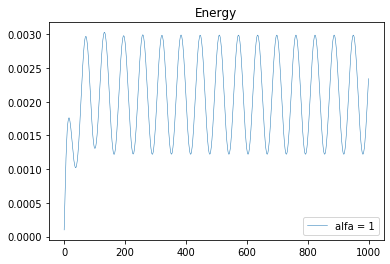

In [76]:
#plotting energy

plt.figure(0)
plt.title(label = "Energy")
plt.plot(data4, linewidth=0.5, label = "alfa = 1")
plt.legend()